# Externe Klimadaten analysieren

Nachdem wir die Wetterdaten der Wetterstation in Waldkirch analysiert haben, wollen wir nun verschiedene Quellen aus dem Internet nutzen.

Viele Forschungseinrichtungen, Einrichtungen und Regierungen veröffentlichen solche Daten, die für uns frei zugänglich sind.

Schau dir gerne auch die Ressourcen-Datei an.

## Pegelstände des Bodensees in Konstanz

[https://www.pegelonline.wsv.de/webservice/dokuRestapi.](https://offenedaten-konstanz.de/dataset/bodensee-pegelstand-konstanz/resource/95d62905-4ac1-4b85-b263-e997f67a7f62)

Um die API anzusprechen, nutzen wir wieder die Bibliothek `requests`:

In [1]:
import requests

In [2]:
response = requests.get("https://www.pegelonline.wsv.de/webservices/rest-api/v2/stations.json?includeTimeseries=true")

Aus der Antwort können wir die Daten extrahieren:

In [3]:
data = response.json()

Die Daten liegen im JSON-Format vor. Das ist ein **Dictionary**.

Genauer gesagt, haben wir eine Liste an Datensätzen vom Typ **Dictionary** erhalten. Der erste Eintrag sieh so aus:

In [4]:
data[0]

{'uuid': 'b475386c-30cc-453a-b3b7-1d17ace13595',
 'number': '48300105',
 'shortname': 'CELLE',
 'longname': 'CELLE',
 'km': 1.74,
 'agency': 'VERDEN',
 'longitude': 10.062164093638698,
 'latitude': 52.62270553213209,
 'water': {'shortname': 'ALLER', 'longname': 'ALLER'},
 'timeseries': [{'shortname': 'W',
   'longname': 'WASSERSTAND ROHDATEN',
   'unit': 'cm',
   'equidistance': 15,
   'gaugeZero': {'unit': 'm. ü. NN',
    'value': 31.82,
    'validFrom': '1936-11-01'}}]}

In [11]:
pegelstaende = []
for d in data:
    if len(d["timeseries"]) == 1:
        gaugeZero = d["timeseries"][0].get("gaugeZero")
        if gaugeZero:
            pegelstaende.append(gaugeZero["value"])

! ACHTUNG in den Daten steckt noch mehr drin! Schaut euch mal die elektrische Leitfähigkeit an

In [6]:
import matplotlib.pyplot as plt

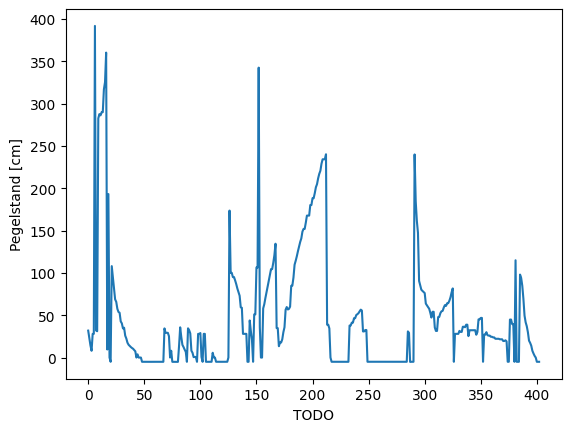

In [7]:
plt.figure()
plt.plot(pegelstaende)
plt.xlabel("TODO")
plt.ylabel("Pegelstand [cm]")
plt.show()